In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import sklearn

import pickle
with open('meshdict.pickle', 'rb') as handle:
    mesh_dict = pickle.load(handle)
    
ctcae = pd.read_excel("C:\\Users\\Buğra\\Downloads\\CTCAE_v5.0.xlsx")
ctcae = ctcae[["MedDRA Code", "CTCAE Term", "MedDRA SOC"]]
ctcae_dict = {}
for i in range(ctcae.shape[0]):
    ctcae_dict[ctcae.iloc[i,0]] = ctcae.iloc[i,1]

In [78]:
data = pd.read_csv("22.8.21_tSNE_with_descriptions.csv")

In [79]:
data

,Disease code,Weight,Group,Group_Description,Study,Study_Name,D_Name
0,D009026,4.17,NCT00090545-2,Second Stage - Increased Accrual,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,mortality
1,D064420,9.09,NCT00090545-1,First Stage - Disease Progression,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,adverse drug events
2,D064420,25.00,NCT00090545-2,Second Stage - Increased Accrual,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,adverse drug events
3,D003248,4.17,NCT00090545-2,Second Stage - Increased Accrual,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,constipation
4,D003681,4.17,NCT00090545-2,Second Stage - Increased Accrual,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,dehydration
...,...,...,...,...,...,...,...
18657,D004761,11.11,NCT03135028-1,ENTO 400 mg,NCT03135028,Entospletinib (ENTO) as Monotherapy and in Com...,clostridium enterocolitis
18658,D000069544,11.11,NCT03135028-1,ENTO 400 mg,NCT03135028,Entospletinib (ENTO) as Monotherapy and in Com...,encephalitis infection
18659,D011014,11.11,NCT03135028-1,ENTO 400 mg,NCT03135028,Entospletinib (ENTO) as Monotherapy and in Com...,pneumonia
18660,D030721,11.11,NCT03135028-1,ENTO 400 mg,NCT03135028,Entospletinib (ENTO) as Monotherapy and in Com...,nymphaea


# 4.1 Summary of the Initial Data

Text(0.5, 0, 'Total number of serious adverse events')

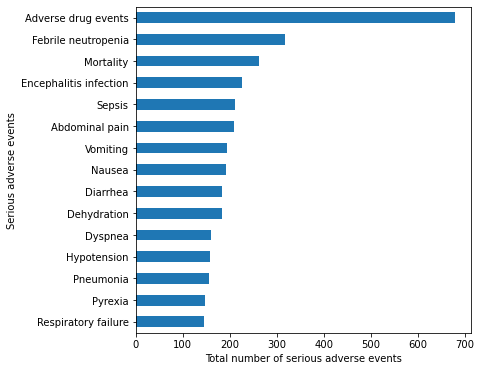

In [80]:
data["D_Name"]  = data.D_Name.str.capitalize()
data.groupby("D_Name").size().nlargest(15).sort_values().plot(kind="barh",figsize=(6,6))
plt.ylabel("Serious adverse events")
plt.xlabel("Total number of serious adverse events")

In [81]:
prevalence = pd.DataFrame((data.drop_duplicates(["Disease code", "Study"]).groupby("Disease code").size()/3.16).sort_values(ascending=False)).head(13)
prevalence = prevalence.rename(columns={0: 'percent'}).reset_index()             
 

for group in range(prevalence.shape[0]):
    if (prevalence.loc[group,"Disease code"]).startswith("D"):
        for item in mesh_dict.items():
            if mesh_dict[prevalence.loc[group,"Disease code"]] == item[1]:
                prevalence.loc[group,"Disease Name"] = item[1][0]
    else:
        term = ctcae_dict[int(prevalence.loc[group,"Disease code"])]
        prevalence.loc[group,"Disease Name"] = term
        
prevalence

,Disease code,percent,Disease Name
0,D064420,99.050633,Drug-Related Side Effects and Adverse Reactions
1,D064147,50.949367,Febrile Neutropenia
2,D005334,42.405063,Fever
3,D011014,39.873418,Pneumonia
4,D004417,39.556962,Dyspnea
5,D009325,38.924051,Nausea
6,D009026,38.924051,Mortality
7,D015746,38.291139,Abdominal Pain
8,D003967,38.291139,Diarrhea
9,D003681,37.658228,Dehydration


In [82]:
numbers = pd.read_csv("number.csv",header=None, index_col=None,
                    names=["number_of_patients", "patients_at_risk", "Weight", "Group", "Group_name","Study","Study_name"])
data = data.join(numbers[['number_of_patients', "patients_at_risk"]])
data

,Disease code,Weight,Group,Group_Description,Study,Study_Name,D_Name,number_of_patients,patients_at_risk
0,D009026,4.17,NCT00090545-2,Second Stage - Increased Accrual,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,Mortality,1,24
1,D064420,9.09,NCT00090545-1,First Stage - Disease Progression,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,Adverse drug events,2,22
2,D064420,25.00,NCT00090545-2,Second Stage - Increased Accrual,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,Adverse drug events,6,24
3,D003248,4.17,NCT00090545-2,Second Stage - Increased Accrual,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,Constipation,1,24
4,D003681,4.17,NCT00090545-2,Second Stage - Increased Accrual,NCT00090545,A Phase II Study of BAY 43-9006 (Sorafenib) in...,Dehydration,1,24
...,...,...,...,...,...,...,...,...,...
18657,D004761,11.11,NCT03135028-1,ENTO 400 mg,NCT03135028,Entospletinib (ENTO) as Monotherapy and in Com...,Clostridium enterocolitis,1,9
18658,D000069544,11.11,NCT03135028-1,ENTO 400 mg,NCT03135028,Entospletinib (ENTO) as Monotherapy and in Com...,Encephalitis infection,1,9
18659,D011014,11.11,NCT03135028-1,ENTO 400 mg,NCT03135028,Entospletinib (ENTO) as Monotherapy and in Com...,Pneumonia,1,9
18660,D030721,11.11,NCT03135028-1,ENTO 400 mg,NCT03135028,Entospletinib (ENTO) as Monotherapy and in Com...,Nymphaea,1,9


In [103]:
number_of_events = pd.DataFrame(data.groupby("Disease code").size())
number_of_events = number_of_events.reset_index()
greater_than_five = list(number_of_events[number_of_events[0]>5]["Disease code"])

filtered_events = data[data["Disease code"].isin(greater_than_five)]


incidence = ((filtered_events.groupby("Disease code")["number_of_patients"].sum()/filtered_events.groupby("Disease code")["patients_at_risk"].sum())*100).sort_values(ascending = False).head(11)
incidence = pd.DataFrame(incidence)
incidence = incidence.rename(columns={0: 'incidence_percents'}).reset_index()

for group in range(incidence.shape[0]):
    if (incidence.loc[group,"Disease code"]).startswith("D"):
        for item in mesh_dict.items():
            if mesh_dict[incidence.loc[group,"Disease code"]] == item[1]:
                incidence.loc[group,"Disease Name"] = item[1][0]
    else:
        term = ctcae_dict[int(incidence.loc[group,"Disease code"])]
        incidence.loc[group,"Disease Name"] = term
incidence

,Disease code,incidence_percents,Disease Name
0,D064420,25.566755,Drug-Related Side Effects and Adverse Reactions
1,D009026,24.971549,Mortality
2,D052016,9.738717,Mucositis
3,D002263,8.162067,Carboxyhemoglobin
4,D060831,7.844791,Hand-Foot Syndrome
5,D003945,6.885246,"Diagnosis, Oral"
6,D064147,6.787968,Febrile Neutropenia
7,D018450,6.559084,Disease Progression
8,D055499,6.382979,Catheter-Related Infections
9,10011914,5.584416,Death NOS


In [104]:
# "Mucositis" is merged with "Diagnosis, Oral" and "Carboxyhemoglobin" is merged with "Hemoglobins".

# 4.2 Application of t-SNE and DBSCAN

## 4.2.1 Visualization of the Data

In [105]:
pd.set_option("display.max_column",8)
pd.set_option("display.max_row",10)
sparse_matrix = data.pivot_table('Weight', ["Disease code"], 'Group',fill_value=0.0)
sparse_matrix

Group,NCT00003896-1,NCT00005908-1,NCT00006184-1,NCT00006721-2,...,NCT03283696-1,NCT03283696-2,NCT03493854-1,NCT03493854-2
Disease code,,,,,,,,,
10000060,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
10000636,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
10001497,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
10001551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
10001675,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
D065227,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
D065467,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
D065631,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0


In [106]:
data_to_filter = pd.read_csv("22.8.21_tSNE_with_descriptions.csv")
data_to_filter = data_to_filter[["Study_Name","Group","Group_Description"]]
data_to_filter = data_to_filter.drop_duplicates("Group")

descriptions = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\05-01-Sorafenib_Doxorubicine_Cytarabine_node_descriptions.csv")
descriptions =  descriptions.rename(columns = {"Unnamed: 0":"Study"})
descriptions = descriptions[descriptions["Study"].isin(sparse_matrix.columns)]

data_to_filter = data_to_filter.merge(descriptions,left_on='Group', right_on='Study')
data_to_filter = data_to_filter.sort_values("Group")
data_to_filter["descriptions"]=data_to_filter["descriptions"].str.lower()
data_to_filter["title"]=data_to_filter["title"].str.lower()
filtered_data = data_to_filter[((data_to_filter["descriptions"].str.contains("sorafenib")) | (data_to_filter["title"].str.contains("sorafenib"))) |
     ((data_to_filter["descriptions"].str.contains("doxorubicin")) | (data_to_filter["title"].str.contains("doxorubicin"))) |
     ((data_to_filter["descriptions"].str.contains("cytarabine")) | (data_to_filter["title"].str.contains("cytarabine")))]
filtered_data = filtered_data.reset_index(drop=True)
filtered_data

,Study_Name,Group,Group_Description,Study,title,descriptions
0,S9912 Combination Chemo in Stage III Ovarian C...,NCT00003896-1,Paclitaxel/CDDP/Liposomal Doxorubicin,NCT00003896-1,paclitaxel/cddp/liposomal doxorubicin,description: no description found
1,Chemotherapy Stem Cell Transplantation and Do...,NCT00006184-1,Recipient - Chemotherapy Group,NCT00006184-1,recipient - chemotherapy group,description: induction chemotherapy with fluda...
2,S0016 Combination Chemotherapy With Monoclonal...,NCT00006721-2,CHOP + Rituximab,NCT00006721-2,chop + rituximab,description: patients receive cyclophosphamide...
3,S0016 Combination Chemotherapy With Monoclonal...,NCT00006721-3,CHOP + Tositumomab,NCT00006721-3,chop + tositumomab,description: patients receive cyclophosphamide...
4,Comparison of Combination Chemotherapy Regimen...,NCT00024102-2,Standard Chemotherapy (AC),NCT00024102-2,standard chemotherapy (ac),description: ac: cyclophosphamide (600 mg/m^2 ...
...,...,...,...,...,...,...
416,A Study of Durvalumab in Combination With R-CH...,NCT03003520-1,DUR + R-CHOP,NCT03003520-1,dur + r-chop,description: on day 1 of each 21-day cycle par...
417,PET-Directed Therapy With Pembrolizumab and Co...,NCT03226249-1,Treatment: Pembrolizumab and AVD Chemotherapy ...,NCT03226249-1,treatment: pembrolizumab and avd chemotherapy ...,description: all patients get 3 cycles (21-day...
418,A Study of Olaratumab (LY3012207) Doxorubicin...,NCT03283696-1,Olaratumab 15 mg/kg + Doxorubicin + Ifosfamide,NCT03283696-1,olaratumab 15 mg/kg + doxorubicin + ifosfamide,description: participants received olaratumab ...
419,A Study of Olaratumab (LY3012207) Doxorubicin...,NCT03283696-2,Olaratumab 20 mg/kg + Doxorubicin + Ifosfamide,NCT03283696-2,olaratumab 20 mg/kg + doxorubicin + ifosfamide,description: participants received olaratumab ...


In [107]:
drugs = ["sorafenib", "doxorubicin", "cytarabine",'mk-8242','rituximab','trastuzumab','docetaxel','polatuzumab','glasdegib',
         'nintedanib','ofatumumab','cyclophosphamide','olaratumab','vincristine','amg 531','nivolumab','brentuximab','adriamycin',
         'venetoclax','paclitaxel',"hidac",'sunitinib','bortezomib','gti-2040','rad001','cisplatin','dexamethasone','thalidomide','pazopanib',
        "capecitabine"]

found_drug = []
for group in range(filtered_data.shape[0]):
    for drug in drugs:
        if drug in filtered_data.loc[group,"descriptions"] or drug in filtered_data.loc[group,"title"]:
            found_drug.append(drug)
        filtered_data.loc[group, 'involving_drug'] = " & ".join(found_drug)
    found_drug=[]
filtered_data

,Study_Name,Group,Group_Description,Study,title,descriptions,involving_drug
0,S9912 Combination Chemo in Stage III Ovarian C...,NCT00003896-1,Paclitaxel/CDDP/Liposomal Doxorubicin,NCT00003896-1,paclitaxel/cddp/liposomal doxorubicin,description: no description found,doxorubicin & paclitaxel
1,Chemotherapy Stem Cell Transplantation and Do...,NCT00006184-1,Recipient - Chemotherapy Group,NCT00006184-1,recipient - chemotherapy group,description: induction chemotherapy with fluda...,doxorubicin & cyclophosphamide & vincristine
2,S0016 Combination Chemotherapy With Monoclonal...,NCT00006721-2,CHOP + Rituximab,NCT00006721-2,chop + rituximab,description: patients receive cyclophosphamide...,doxorubicin & rituximab & cyclophosphamide & v...
3,S0016 Combination Chemotherapy With Monoclonal...,NCT00006721-3,CHOP + Tositumomab,NCT00006721-3,chop + tositumomab,description: patients receive cyclophosphamide...,doxorubicin & cyclophosphamide & vincristine
4,Comparison of Combination Chemotherapy Regimen...,NCT00024102-2,Standard Chemotherapy (AC),NCT00024102-2,standard chemotherapy (ac),description: ac: cyclophosphamide (600 mg/m^2 ...,doxorubicin & cyclophosphamide
...,...,...,...,...,...,...,...
416,A Study of Durvalumab in Combination With R-CH...,NCT03003520-1,DUR + R-CHOP,NCT03003520-1,dur + r-chop,description: on day 1 of each 21-day cycle par...,doxorubicin & rituximab & cyclophosphamide & v...
417,PET-Directed Therapy With Pembrolizumab and Co...,NCT03226249-1,Treatment: Pembrolizumab and AVD Chemotherapy ...,NCT03226249-1,treatment: pembrolizumab and avd chemotherapy ...,description: all patients get 3 cycles (21-day...,doxorubicin & cyclophosphamide & vincristine
418,A Study of Olaratumab (LY3012207) Doxorubicin...,NCT03283696-1,Olaratumab 15 mg/kg + Doxorubicin + Ifosfamide,NCT03283696-1,olaratumab 15 mg/kg + doxorubicin + ifosfamide,description: participants received olaratumab ...,doxorubicin & olaratumab
419,A Study of Olaratumab (LY3012207) Doxorubicin...,NCT03283696-2,Olaratumab 20 mg/kg + Doxorubicin + Ifosfamide,NCT03283696-2,olaratumab 20 mg/kg + doxorubicin + ifosfamide,description: participants received olaratumab ...,doxorubicin & olaratumab


In [108]:
delete = filtered_data[(filtered_data["involving_drug"].str.contains("doxorubicin & cytarabine")) | 
            (filtered_data["involving_drug"].str.contains("sorafenib & cytarabine")) |
           (filtered_data["involving_drug"].str.contains("sorafenib & doxorubicin"))]["Group"]

In [109]:
filtered_data = filtered_data[~filtered_data["Group"].isin(delete)].sort_values("involving_drug").reset_index(drop=True)
filtered_data

,Study_Name,Group,Group_Description,Study,title,descriptions,involving_drug
0,Entospletinib Monotherapy and in Combination W...,NCT02343939-1,Group A Phase 1b ENTO 200 mg + Cytarabine + Da...,NCT02343939-1,group a phase 1b ento 200 mg + cytarabine + da...,description: participants received ento 200 mg...,cytarabine
1,BI 811283 in Combination With Cytarabine in Pr...,NCT00632749-13,360 mg BI 811283 + 20 mg Cytarabine - Treatmen...,NCT00632749-13,360 mg bi 811283 + 20 mg cytarabine - treatmen...,description: 360 mg of bi 811283 (preconcentra...,cytarabine
2,BI 811283 in Combination With Cytarabine in Pr...,NCT00632749-14,420 mg BI 811283 + 20 mg Cytarabine - Treatmen...,NCT00632749-14,420 mg bi 811283 + 20 mg cytarabine - treatmen...,description: 420 mg of bi 811283 (preconcentra...,cytarabine
3,BI 811283 in Combination With Cytarabine in Pr...,NCT00632749-2,15 mg BI 811283 + 20 mg Cytarabine - Treatment...,NCT00632749-2,15 mg bi 811283 + 20 mg cytarabine - treatment...,description: 15 mg of bi 811283 (preconcentrat...,cytarabine
4,BI 811283 in Combination With Cytarabine in Pr...,NCT00632749-3,30 mg BI 811283 + 20 mg Cytarabine - Treatment...,NCT00632749-3,30 mg bi 811283 + 20 mg cytarabine - treatment...,description: 30 mg of bi 811283 (preconcentrat...,cytarabine
...,...,...,...,...,...,...,...
396,Sorafenib and Everolimus in Treating Patients ...,NCT00474929-2,Phase I Dose Level 1,NCT00474929-2,phase i dose level 1,description: phase i: dose level 1: sorafenib ...,sorafenib & rad001
397,Sunitinib Malate or Sorafenib Tosylate in Trea...,NCT00326898-1,Arm A (Sunitinib + Sorafenib Placebo),NCT00326898-1,arm a (sunitinib + sorafenib placebo),description: beginning 4-12 weeks following ra...,sorafenib & sunitinib
398,Sunitinib Malate or Sorafenib Tosylate in Trea...,NCT00326898-2,Arm B (Sorafenib + Sunitinib Placebo),NCT00326898-2,arm b (sorafenib + sunitinib placebo),description: beginning 4-12 weeks following ra...,sorafenib & sunitinib
399,Axitinib (AG-013736) For the Treatment of Meta...,NCT00920816-4,Sorafenib (Second-line Participants),NCT00920816-4,sorafenib (second-line participants),description: asian participants with prior sys...,sorafenib & sunitinib


In [110]:
filtered_sparse_matrix = sparse_matrix.loc[:,filtered_data["Group"]]
filtered_sparse_matrix

Group,NCT02343939-1,NCT00632749-13,NCT00632749-14,NCT00632749-2,...,NCT00326898-1,NCT00326898-2,NCT00920816-4,NCT00326898-3
Disease code,,,,,,,,,
10000060,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0
10000636,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0
10001497,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0
10001551,0.0,0.0,0.0,0.0,...,0.64,0.64,0.0,0.0
10001675,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
D065227,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0
D065467,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0
D065631,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0


(1725, 2)
344


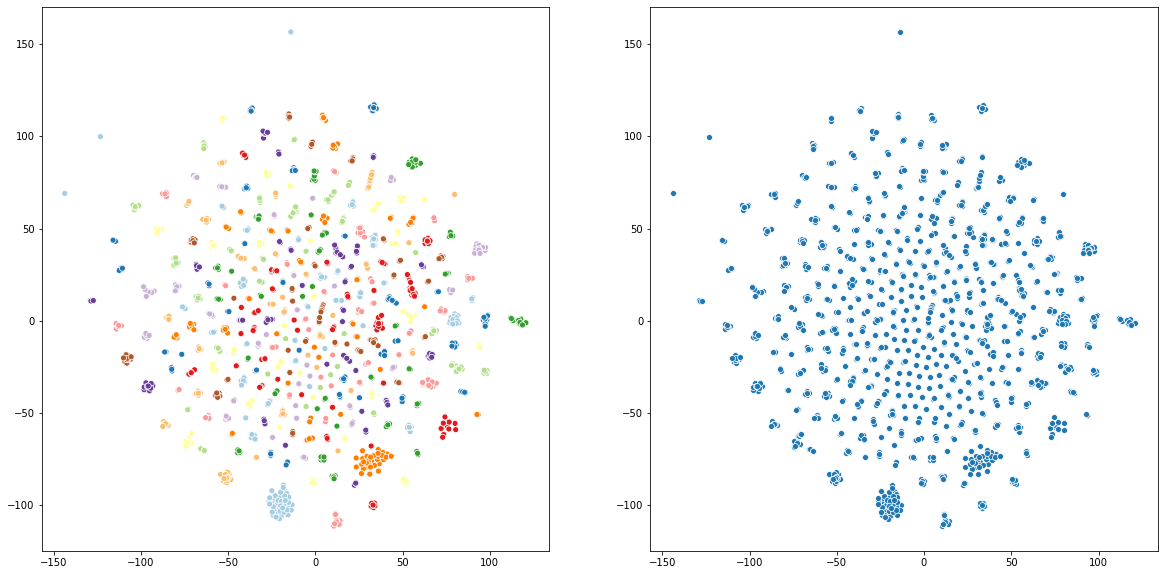

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sparse_matrix)

X_embedded = TSNE(n_components=2, perplexity = 1,early_exaggeration=12, metric="cosine", random_state=0).fit_transform(scaled_data)
print(X_embedded.shape)

db = DBSCAN(eps=4, min_samples=2,algorithm="ball_tree").fit(X_embedded)
print(len(np.unique(db.labels_)))

x = X_embedded[:,0]
y = X_embedded[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
sns.scatterplot(x=x,y=y,  ax =ax2)

sns.scatterplot(x=x,y=y, hue =db.labels_, ax =ax1,palette="Paired")
ax1.get_legend().remove()

plt.show()

## 4.2.2 Clusters of Similarity

In [112]:
D_names = data[["D_Name","Disease code"]]
D_names = D_names.drop_duplicates("Disease code").sort_values("Disease code").reset_index(drop=True)
D_names

,D_Name,Disease code
0,Abdominal distension,10000060
1,Activated partial thromboplastin time prolonged,10000636
2,Agitation,10001497
3,Alanine aminotransferase increased,10001551
4,Alkaline phosphatase increased,10001675
...,...,...
1720,Transfusion reaction,D065227
1721,Transcatheter aortic valve replacement,D065467
1722,Allergic rhinitis,D065631
1723,Cerebrospinal fluid leakage,D065634


In [113]:
scaled_nopca_data = D_names
scaled_nopca_data["DB_Labels"] = [i for i in db.labels_]
print(len(scaled_nopca_data["DB_Labels"].unique()), "labels")
scaled_nopca_data.sort_values("DB_Labels")

344 labels


,D_Name,Disease code,DB_Labels
362,Encephalitis infection,D000069544,-1
389,Cardiorespiratory fitness,D000072599,-1
1392,Temporomandibular joint disorders,D013705,-1
0,Abdominal distension,10000060,0
950,Hepatocellular carcinoma,D006528,0
...,...,...,...
1449,Meningococcal hemorrhagic adrenalitis,D014884,341
1420,Ulcers,D014456,341
1713,Drug overdose,D062787,342
1430,Urticaria,D014581,342


In [114]:
diseases_to_check = ["D018798", "D004347", "D016535", "D012804", "D015451"]
print(scaled_nopca_data[scaled_nopca_data["Disease code"].isin(diseases_to_check)],"\n")

diseases_to_check = ["D007402", "D012220","D017541", "D001924"]
print(scaled_nopca_data[scaled_nopca_data["Disease code"].isin(diseases_to_check)],"\n")

diseases_to_check = ["10048762", "D005891","D015414", "10003012", "D000140", "D008708", "10003012", "D010494"]
print(scaled_nopca_data[scaled_nopca_data["Disease code"].isin(diseases_to_check)])

                            D_Name Disease code  DB_Labels
782               Drug interaction      D004347         59
1342           Sick sinus syndrome      D012804         59
1462  Lymphocytic leukemia chronic      D015451         59
1492     Bronchial hyperreactivity      D016535         59
1551        Anemia iron-deficiency      D018798         59 

                D_Name Disease code  DB_Labels
604   Brain concussion      D001924         59
1018        Intertrigo      D007402        245
1324          Rhinitis      D012220         59
1518    Pseudoaneurysm      D017541         59 

                         D_Name Disease code  DB_Labels
7       Appendicitis perforated     10003012          7
198             Tooth infection     10048762        116
451             Lactic acidosis      D000140         95
885                  Gingivitis      D005891        116
1120          Methemoglobinemia      D008708         95
1234  Constrictive pericarditis      D010494          7


In [26]:
diseases_to_check = ["D001468", "D013922", "D004814","D013035", "D015878", "D013161"]
print(scaled_nopca_data[scaled_nopca_data["Disease code"].isin(diseases_to_check)])

               D_Name Disease code  DB_Labels
563         thoracica      D001468        256
813    epidermal cyst      D004814        256
1351    muscle spasms      D013035        256
1361  splenic rupture      D013161        338
1399   thrombocytosis      D013922        256
1475        mydriasis      D015878        256


In [120]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 1]

,D_Name,Disease code,DB_Labels
1,Activated partial thromboplastin time prolonged,10000636,1
62,Fibrinogen decreased,10016596,1
96,Inr increased,10022402,1
589,Blood glucose,D001786,1
628,Calcium,D002118,1
747,Deoxyglucose,D003847,1
1091,Magnesium,D008274,1
1271,Potassium,D011188,1
1337,Serum albumin,D012709,1


In [121]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 3]

,D_Name,Disease code,DB_Labels
3,Alanine aminotransferase increased,10001551,3
8,Aspartate aminotransferase increased,10003481,3
16,Blood bilirubin increased,10005364,3
42,Death nos,10011914,3


In [122]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 17]

,D_Name,Disease code,DB_Labels
20,Bone pain,10006002,17
439,Gingipains,D000080867,17
780,Dizziness,D004244,17
1014,Influenza,D007251,17
1549,Joint pain,D018771,17


In [123]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 92]

,D_Name,Disease code,DB_Labels
140,Postnasal drip,10036402,92
506,Anorexia,D000855,92
856,Fatigue,D005221,92
977,Hyperglycemia,D006943,92
997,Hyponatremia,D007010,92
1624,Hypoalbuminemia,D034141,92


In [119]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 116]

,D_Name,Disease code,DB_Labels
198,Tooth infection,10048762,116
885,Gingivitis,D005891,116


In [124]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 195]

,D_Name,Disease code,DB_Labels
393,Cancer pain,D000072716,195
703,Constipation,D003248,195
740,Dehydration,D003681,195
764,Diarrhea,D003967,195
906,Headache,D006261,195
1158,Nausea,D009325,195
1251,Pleural effusion,D010996,195
1444,Vomiting,D014839,195
1469,Abdominal pain,D015746,195


In [125]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 275]

,D_Name,Disease code,DB_Labels
641,Renal cell carcinoma,D002292,275
793,Dyspnea,D004417,275
843,Extrasystoles,D005117,275
862,Fever,D005334,275
1128,Mortality,D009026,275
1254,Pneumonia,D011014,275
1315,Infections upper respiratory,D012141,275
1552,Sepsis,D018805,275
1716,Febrile neutropenia,D064147,275
1718,Adverse drug events,D064420,275


In [126]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 332]

,D_Name,Disease code,DB_Labels
1170,Neuralgia,D009437,332
1311,Respiratory failure,D012131,332
1343,Sinus infections,D012852,332


# 4.3 Application of Co-Clustering and p-Value Calculations

## 4.3.1 Assignment of Serious Adverse Events to the Drugs

In [128]:
means_of_drugs = pd.DataFrame()
means_of_drugs["cytarabine_solo"] = filtered_sparse_matrix.iloc[:,0:124].mean(axis=1)
means_of_drugs["doxorubicin_solo"] = filtered_sparse_matrix.iloc[:,124:317].mean(axis=1)
means_of_drugs["sorafenib_solo"] = filtered_sparse_matrix.iloc[:,317:].mean(axis=1)

means_of_drugs

,cytarabine_solo,doxorubicin_solo,sorafenib_solo
Disease code,,,
10000060,0.056935,0.060259,0.061667
10000636,0.037823,0.000674,0.006905
10001497,0.042984,0.016010,0.028333
10001551,0.870000,0.242902,0.373690
10001675,0.096774,0.202332,0.231310
...,...,...,...
D065227,0.061935,0.000000,0.000000
D065467,0.000000,0.000000,0.000000
D065631,0.000000,0.155440,0.000000


<ipython-input-129-baf5be3047a1>:10: RuntimeWarning: invalid value encountered in power
  plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1,aspect="auto")


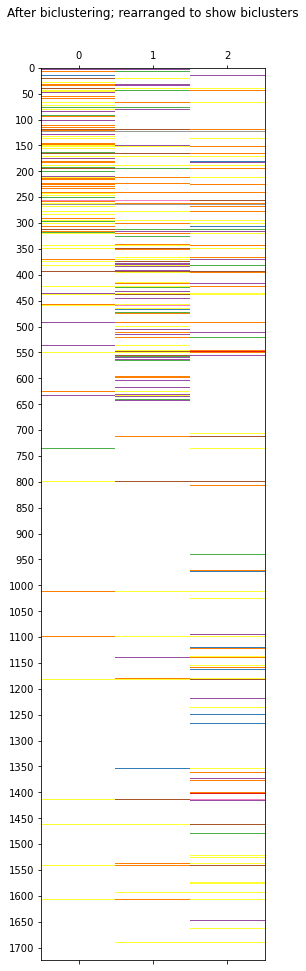

In [129]:
from sklearn.cluster import SpectralCoclustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(means_of_drugs)
model = SpectralCoclustering(n_clusters=3,random_state=8)
model.fit(scaled_data)

fit_data = scaled_data[np.argsort(model.row_labels_)]

plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1,aspect="auto")
plt.yticks(np.arange(0, 1725, 50))
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [130]:
data = pd.read_csv("22.8.21_tSNE_with_descriptions.csv")
terms_and_ids = data[["D_Name","Disease code"]].drop_duplicates("Disease code").reset_index(drop=True).sort_values("Disease code")

In [98]:
conditions = filtered_sparse_matrix.iloc[np.argsort(model.row_labels_)[0:330]].index
cytarabine = terms_and_ids[terms_and_ids["Disease code"].isin(conditions)]
cytarabine = cytarabine.reset_index(drop=True)
cytarabine

,D_Name,Disease code
0,activated partial thromboplastin time prolonged,10000636
1,agitation,10001497
2,alanine aminotransferase increased,10001551
3,anal pain,10002167
4,appendicitis perforated,10003012
...,...,...
325,suicidal ideation,D059020
326,drug overdose,D062787
327,febrile neutropenia,D064147
328,adverse drug events,D064420


In [99]:
conditions = filtered_sparse_matrix.iloc[np.argsort(model.row_labels_)[330:640]].index
doxorubicin = terms_and_ids[terms_and_ids["Disease code"].isin(conditions)]
doxorubicin = doxorubicin.reset_index(drop=True)
doxorubicin

,D_Name,Disease code
0,blood bicarbonate decreased,10005359
1,blurred vision,10005886
2,catheter related infection,10007810
3,cd4 lymphocytes decreased,10007839
4,colonic perforation,10010001
...,...,...
305,musculoskeletal pain,D059352
306,lacunar infarction,D059409
307,muscle pain,D063806
308,allergic rhinitis,D065631


In [133]:
conditions = filtered_sparse_matrix.iloc[np.argsort(model.row_labels_)[640:]].index
sorafenib = terms_and_ids[terms_and_ids["Disease code"].isin(conditions)]
sorafenib = sorafenib.reset_index(drop=True)
sorafenib

,D_Name,Disease code
0,abdominal distension,10000060
1,alkaline phosphatase increased,10001675
2,aortic injury,10002899
3,atrioventricular block complete,10003673
4,atrioventricular block first degree,10003674
...,...,...
1080,drug reaction with eosinophilia and systemic s...,D063926
1081,ankle fracture,D064386
1082,central anticholinergic syndrome,D064807
1083,transcatheter aortic valve replacement,D065467


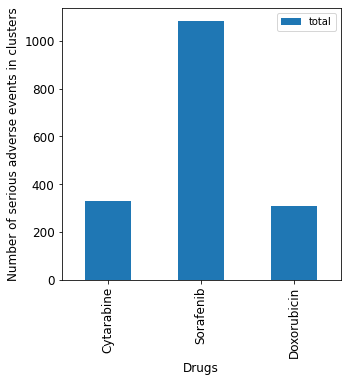

In [134]:
total_events = pd.DataFrame({"drug":["cytarabine", "sorafenib","doxorubicin"], "total":[cytarabine.shape[0],sorafenib.shape[0],doxorubicin.shape[0]]})
total_events.plot.bar(x="drug", y="total",figsize=(5,5))
plt.xlabel("Drugs",fontsize=12)
plt.ylabel("Number of serious adverse events in clusters", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0, 1, 2], ['Cytarabine', 'Sorafenib', 'Doxorubicin'],fontsize=12)
plt.show()

In [253]:
total_events

,drug,total
0,cytarabine,330
1,sorafenib,1085
2,doxorubicin,310


## 4.3.2 P-Value Calculations

In [135]:
ctcae = pd.read_excel("C:\\Users\\Buğra\\Downloads\\CTCAE_v5.0.xlsx")
ctcae = ctcae[["MedDRA Code", "CTCAE Term", "MedDRA SOC"]]
ctcae_d = {}
for i in range(ctcae.shape[0]):
    ctcae_d[ctcae.iloc[i,0]] = ctcae.iloc[i,2]
ctcae_d

{10002272: 'Blood and lymphatic system disorders',
 10005329: 'Blood and lymphatic system disorders',
 10048580: 'Blood and lymphatic system disorders',
 10013442: 'Blood and lymphatic system disorders',
 10014950: 'Blood and lymphatic system disorders',
 10016288: 'Blood and lymphatic system disorders',
 10019491: 'Blood and lymphatic system disorders',
 10019515: 'Blood and lymphatic system disorders',
 10024378: 'Blood and lymphatic system disorders',
 10025182: 'Blood and lymphatic system disorders',
 10027506: 'Blood and lymphatic system disorders',
 10043648: 'Blood and lymphatic system disorders',
 10061589: 'Cardiac disorders',
 10003586: 'Cardiac disorders',
 10003658: 'Cardiac disorders',
 10003662: 'Cardiac disorders',
 10003673: 'Cardiac disorders',
 10003674: 'Cardiac disorders',
 10007515: 'Cardiac disorders',
 10007541: 'Cardiac disorders',
 10008481: 'Cardiac disorders',
 10010276: 'Cardiac disorders',
 10011703: 'Cardiac disorders',
 10019279: 'Cardiac disorders',
 100

In [109]:
cytarabine_root_parent = pd.DataFrame(columns=['Serious Adverse Event', 'Disease code', 'Parent', "Root"])
z = 0
for group in range(cytarabine.shape[0]):
    D_name = cytarabine.loc[group,"D_Name"]
    Disease_code = cytarabine.loc[group,"Disease code"]
    
    if (cytarabine.loc[group,"Disease code"]).startswith("D"):    
        for a in mesh_dict[cytarabine.loc[group,"Disease code"]][1:]:          
            for item in mesh_dict.items():
                if a[:7] in item[1]:
                    parent = item[1][0]
            for item in mesh_dict.items():
                if a[:3] in item[1]:
                    root = item[1][0]
                    new_row = pd.Series({'Serious Adverse Event':D_name, 'Disease code':Disease_code, 'Parent':parent, "Root":root})
                    cytarabine_root_parent = cytarabine_root_parent.append(new_row, ignore_index=True)
    else:  
        parent = ctcae_d[int(cytarabine.loc[group,"Disease code"])]
        root = ctcae_d[int(cytarabine.loc[group,"Disease code"])]
        new_row = pd.Series({'Serious Adverse Event':D_name, 'Disease code':Disease_code, 'Parent':parent, "Root":root})
        cytarabine_root_parent = cytarabine_root_parent.append(new_row, ignore_index=True)
cytarabine_root_parent

,Serious Adverse Event,Disease code,Parent,Root
0,activated partial thromboplastin time prolonged,10000636,Investigations,Investigations
1,agitation,10001497,Psychiatric disorders,Psychiatric disorders
2,alanine aminotransferase increased,10001551,Investigations,Investigations
3,anal pain,10002167,Gastrointestinal disorders,Gastrointestinal disorders
4,appendicitis perforated,10003012,Infections and infestations,Infections and infestations
...,...,...,...,...
593,drug overdose,D062787,Drug Therapy,Therapeutics
594,febrile neutropenia,D064147,Hematologic Diseases,Hemic and Lymphatic Diseases
595,adverse drug events,D064420,Drug-Related Side Effects and Adverse Reactions,Chemically-Induced Disorders
596,transfusion reaction,D065227,Hematologic Diseases,Hemic and Lymphatic Diseases


In [110]:
doxorubicin_root_parent = pd.DataFrame(columns=['Serious Adverse Event', 'Disease code', 'Parent', "Root"])
z = 0
for group in range(doxorubicin.shape[0]):
    D_name = doxorubicin.loc[group,"D_Name"]
    Disease_code = doxorubicin.loc[group,"Disease code"]
    
    if (doxorubicin.loc[group,"Disease code"]).startswith("D"):    
        for a in mesh_dict[doxorubicin.loc[group,"Disease code"]][1:]:          
            for item in mesh_dict.items():
                if a[:7] in item[1]:
                    parent = item[1][0]
            for item in mesh_dict.items():
                if a[:3] in item[1]:
                    root = item[1][0]
                    new_row = pd.Series({'Serious Adverse Event':D_name, 'Disease code':Disease_code, 'Parent':parent, "Root":root})
                    doxorubicin_root_parent = doxorubicin_root_parent.append(new_row, ignore_index=True)
    else:  
        parent = ctcae_d[int(doxorubicin.loc[group,"Disease code"])]
        root = ctcae_d[int(doxorubicin.loc[group,"Disease code"])]
        new_row = pd.Series({'Serious Adverse Event':D_name, 'Disease code':Disease_code, 'Parent':parent, "Root":root})
        doxorubicin_root_parent = doxorubicin_root_parent.append(new_row, ignore_index=True)
doxorubicin_root_parent

,Serious Adverse Event,Disease code,Parent,Root
0,blood bicarbonate decreased,10005359,Investigations,Investigations
1,blurred vision,10005886,Eye disorders,Eye disorders
2,catheter related infection,10007810,Infections and infestations,Infections and infestations
3,cd4 lymphocytes decreased,10007839,Investigations,Investigations
4,colonic perforation,10010001,Gastrointestinal disorders,Gastrointestinal disorders
...,...,...,...,...
574,allergic rhinitis,D065631,Hypersensitivity,Immune System Diseases
575,cerebrospinal fluid leakage,D065634,Neurologic Manifestations,Nervous System Diseases
576,cerebrospinal fluid leakage,D065634,"Trauma, Nervous System",Nervous System Diseases
577,cerebrospinal fluid leakage,D065634,Signs and Symptoms,"Pathological Conditions, Signs and Symptoms"


In [111]:
sorafenib_root_parent = pd.DataFrame(columns=['Serious Adverse Event', 'Disease code', 'Parent', "Root"])
z = 0
for group in range(sorafenib.shape[0]):
    D_name = sorafenib.loc[group,"D_Name"]
    Disease_code = sorafenib.loc[group,"Disease code"]
    
    if (sorafenib.loc[group,"Disease code"]).startswith("D"):    
        for a in mesh_dict[sorafenib.loc[group,"Disease code"]][1:]:          
            for item in mesh_dict.items():
                if a[:7] in item[1]:
                    parent = item[1][0]
            for item in mesh_dict.items():
                if a[:3] in item[1]:
                    root = item[1][0]
                    new_row = pd.Series({'Serious Adverse Event':D_name, 'Disease code':Disease_code, 'Parent':parent, "Root":root})
                    sorafenib_root_parent = sorafenib_root_parent.append(new_row, ignore_index=True)
    else:  
        parent = ctcae_d[int(sorafenib.loc[group,"Disease code"])]
        root = ctcae_d[int(sorafenib.loc[group,"Disease code"])]
        new_row = pd.Series({'Serious Adverse Event':D_name, 'Disease code':Disease_code, 'Parent':parent, "Root":root})
        sorafenib_root_parent = sorafenib_root_parent.append(new_row, ignore_index=True)
sorafenib_root_parent

,Serious Adverse Event,Disease code,Parent,Root
0,abdominal distension,10000060,Gastrointestinal disorders,Gastrointestinal disorders
1,alkaline phosphatase increased,10001675,Investigations,Investigations
2,aortic injury,10002899,"Injury, poisoning and procedural complications","Injury, poisoning and procedural complications"
3,atrioventricular block complete,10003673,Cardiac disorders,Cardiac disorders
4,atrioventricular block first degree,10003674,Cardiac disorders,Cardiac disorders
...,...,...,...,...
2087,transcatheter aortic valve replacement,D065467,Cardiovascular Surgical Procedures,"Surgical Procedures, Operative"
2088,transcatheter aortic valve replacement,D065467,Prosthesis Implantation,"Surgical Procedures, Operative"
2089,transcatheter aortic valve replacement,D065467,Thoracic Surgical Procedures,"Surgical Procedures, Operative"
2090,hyperlactatemia,D065906,Metabolic Diseases,Nutritional and Metabolic Diseases


In [141]:
from scipy.stats import chisquare

In [142]:
cytarabine_root = cytarabine_root_parent[["Serious Adverse Event", "Disease code", "Root"]].drop_duplicates()
sorafenib_root = sorafenib_root_parent[["Serious Adverse Event", "Disease code", "Root"]].drop_duplicates()
doxorubicin_root = doxorubicin_root_parent[["Serious Adverse Event", "Disease code", "Root"]].drop_duplicates()

In [143]:
cytarabine_root_count = pd.DataFrame(cytarabine_root.groupby("Root").size())
sorafenib_root_count = pd.DataFrame(sorafenib_root.groupby("Root").size())
doxorubicin_root_count = pd.DataFrame(doxorubicin_root.groupby("Root").size())

In [133]:
merged_roots= cytarabine_root_count.merge(sorafenib_root_count, on="Root",suffixes=('_cytarabine', '_sorafenib'),how='outer')
merged_roots = merged_roots.merge(doxorubicin_root_count, on="Root",how='outer')
merged_roots = merged_roots.rename(columns={'0_cytarabine': 'cytarabine', '0_sorafenib': 'sorafenib', 0:"doxorubicin"})
merged_roots = merged_roots.transpose() 
merged_roots = merged_roots.fillna(0)
merged_roots

Root,"Amino Acids, Peptides, and Proteins",Animal Diseases,Animal Structures,Bacteria,Behavior and Behavior Mechanisms,Biological Factors,Biological Phenomena,Blood and lymphatic system disorders,Body Regions,Carbohydrates,...,Persons,Pharmaceutical Preparations,Polycyclic Compounds,"Pregnancy, puerperium and perinatal conditions",Sense Organs,Surgical and medical procedures,Urogenital System,Vascular disorders,Integumentary System Physiological Phenomena,Lipids
cytarabine,5.0,1.0,1.0,8.0,8.0,1.0,1.0,2.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sorafenib,15.0,6.0,1.0,11.0,16.0,6.0,2.0,1.0,9.0,2.0,...,2.0,1.0,3.0,1.0,1.0,1.0,4.0,4.0,0.0,0.0
doxorubicin,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,...,2.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0


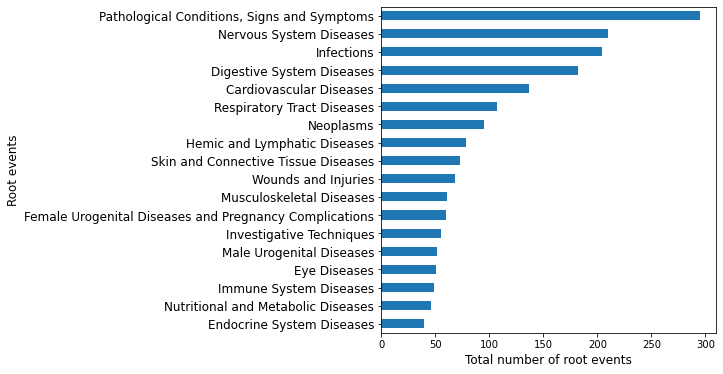

In [275]:
merged_roots.sum().nlargest(18).sort_values().plot(kind="barh", figsize=(6,6))
plt.ylabel("Root events",fontsize=12)
plt.xlabel("Total number of root events",fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [145]:
summed_lymphatic = merged_roots["Blood and lymphatic system disorders"]+merged_roots ["Hemic and Lymphatic Diseases"]
merged_roots["Hemic and Lymphatic Diseases"] = summed_lymphatic
merged_roots = merged_roots.drop("Blood and lymphatic system disorders", axis=1)

summed_cardiac = merged_roots["Cardiac disorders"]+merged_roots ["Cardiovascular Diseases"]
merged_roots["Cardiovascular Diseases"] = summed_cardiac
merged_roots = merged_roots.drop("Cardiac disorders", axis=1)

summed_ear = merged_roots["Ear and labyrinth disorders"]+merged_roots ["Otorhinolaryngologic Diseases"]
merged_roots["Otorhinolaryngologic Diseases"] = summed_ear
merged_roots = merged_roots.drop("Ear and labyrinth disorders", axis=1)

summed_endocrine = merged_roots["Endocrine disorders"]+merged_roots ["Endocrine System Diseases"]
merged_roots["Endocrine System Diseases"] = summed_endocrine
merged_roots = merged_roots.drop("Endocrine disorders", axis=1)

summed_eye = merged_roots["Eye disorders"]+merged_roots ["Eye Diseases"]
merged_roots["Eye Diseases"] = summed_eye
merged_roots = merged_roots.drop("Eye disorders", axis=1)

summed_gi = merged_roots["Gastrointestinal disorders"]+merged_roots ["Digestive System Diseases"]
merged_roots["Digestive System Diseases"] = summed_gi
merged_roots = merged_roots.drop("Gastrointestinal disorders", axis=1)

summed_signs = merged_roots["General disorders and administration site conditions"]+merged_roots ["Pathological Conditions, Signs and Symptoms"]
merged_roots["Pathological Conditions, Signs and Symptoms"] = summed_signs
merged_roots = merged_roots.drop("General disorders and administration site conditions", axis=1)

summed_biliary = merged_roots["Hepatobiliary disorders"]+merged_roots ["Digestive System Diseases"]
merged_roots["Digestive System Diseases"] = summed_biliary
merged_roots = merged_roots.drop("Hepatobiliary disorders", axis=1)

summed_immune = merged_roots["Immune system disorders"]+merged_roots ["Immune System Diseases"]
merged_roots["Immune System Diseases"] = summed_immune
merged_roots = merged_roots.drop("Immune system disorders", axis=1)

summed_infection = merged_roots["Infections and infestations"]+merged_roots ["Infections"]
merged_roots["Infections"] = summed_infection
merged_roots = merged_roots.drop("Infections and infestations", axis=1)

summed_injury = merged_roots["Injury, poisoning and procedural complications"]+merged_roots ["Wounds and Injuries"]
merged_roots["Wounds and Injuries"] = summed_injury
merged_roots = merged_roots.drop("Injury, poisoning and procedural complications", axis=1)

summed_inv = merged_roots["Investigations"]+merged_roots ["Investigative Techniques"]
merged_roots["Investigative Techniques"] = summed_inv
merged_roots = merged_roots.drop("Investigations", axis=1)

summed_meta = merged_roots["Metabolism and nutrition disorders"]+merged_roots ["Nutritional and Metabolic Diseases"]
merged_roots["Nutritional and Metabolic Diseases"] = summed_meta
merged_roots = merged_roots.drop("Metabolism and nutrition disorders", axis=1)

summed_skeletal = merged_roots["Musculoskeletal and connective tissue disorders"]+merged_roots ["Musculoskeletal Diseases"]
merged_roots["Musculoskeletal Diseases"] = summed_skeletal
merged_roots = merged_roots.drop("Musculoskeletal and connective tissue disorders", axis=1)

summed_neoplasms = merged_roots["Neoplasms benign, malignant and unspecified (incl cysts and polyps)"]+merged_roots ["Neoplasms"]
merged_roots["Neoplasms"] = summed_neoplasms
merged_roots = merged_roots.drop("Neoplasms benign, malignant and unspecified (incl cysts and polyps)", axis=1)

summed_nervous = merged_roots["Nervous system disorders"]+merged_roots ["Nervous System Diseases"]
merged_roots["Nervous System Diseases"] = summed_nervous
merged_roots = merged_roots.drop("Nervous system disorders", axis=1)

summed_behavior = merged_roots["Psychiatric disorders"]+merged_roots ["Behavior and Behavior Mechanisms"]
merged_roots["Behavior and Behavior Mechanisms"] = summed_behavior
merged_roots = merged_roots.drop("Psychiatric disorders", axis=1)

summed_female = merged_roots["Renal and urinary disorders"]+merged_roots ["Female Urogenital Diseases and Pregnancy Complications"]
summed_male = merged_roots["Renal and urinary disorders"]+merged_roots ["Male Urogenital Diseases"]
merged_roots["Female Urogenital Diseases and Pregnancy Complications"] = summed_female
merged_roots["Male Urogenital Diseases"] = summed_male
merged_roots = merged_roots.drop("Renal and urinary disorders", axis=1)

summed_resp = merged_roots["Respiratory, thoracic and mediastinal disorders"]+merged_roots ["Respiratory Tract Diseases"]
merged_roots["Respiratory Tract Diseases"] = summed_resp
merged_roots = merged_roots.drop("Respiratory, thoracic and mediastinal disorders", axis=1)

summed_skin = merged_roots["Skin and subcutaneous tissue disorders"]+merged_roots ["Skin and Connective Tissue Diseases"]
merged_roots["Skin and Connective Tissue Diseases"] = summed_skin
merged_roots = merged_roots.drop("Skin and subcutaneous tissue disorders", axis=1)

summed_vascular = merged_roots["Vascular disorders"]+merged_roots ["Cardiovascular Diseases"]
merged_roots["Cardiovascular Diseases"] = summed_vascular
merged_roots = merged_roots.drop("Vascular disorders", axis=1)


In [146]:
summed_hemics = merged_roots["Hemic and Immune Systems"]+merged_roots ["Hemic and Lymphatic Diseases"]
merged_roots["Hemic and Lymphatic Diseases"] = summed_hemics
merged_roots = merged_roots.drop("Hemic and Immune Systems", axis=1)

summed_nervous = merged_roots["Nervous System"]+merged_roots ["Nervous System Diseases"]
merged_roots["Nervous System Diseases"] = summed_nervous
merged_roots = merged_roots.drop("Nervous System", axis=1)

summed_diges = merged_roots["Digestive System Diseases"]+merged_roots ["Digestive System"] +merged_roots ["Digestive System and Oral Physiological Phenomena"]
merged_roots["Digestive System Diseases"] = summed_diges
merged_roots = merged_roots.drop("Digestive System and Oral Physiological Phenomena", axis=1)
merged_roots = merged_roots.drop("Digestive System", axis=1)

summed_signs = merged_roots["Physiological Phenomena"]+merged_roots ["Pathological Conditions, Signs and Symptoms"]+merged_roots ["Circulatory and Respiratory Physiological Phenomena"]
merged_roots["Circulatory and Respiratory Physiological Phenomena"] = summed_signs
merged_roots = merged_roots.drop("Physiological Phenomena", axis=1)
merged_roots = merged_roots.drop("Circulatory and Respiratory Physiological Phenomena", axis=1)


summed_behave = merged_roots["Behavior and Behavior Mechanisms"]+merged_roots ["Behavioral Disciplines and Activities"]
merged_roots["Behavior and Behavior Mechanisms"] = summed_behave
merged_roots = merged_roots.drop("Behavioral Disciplines and Activities", axis=1)



In [156]:
all_conditions = total_events.sum(axis=1).sum()
p_vals_root = pd.DataFrame()
for i in range(merged_roots.shape[1]):
    ratio = merged_roots.iloc[:,i].sum() / all_conditions
    p_vals_root[merged_roots.columns[i]] = chisquare(merged_roots.iloc[:,i],total_events.sum(axis=1)*ratio)
p_vals_root

,"Amino Acids, Peptides, and Proteins",Animal Diseases,Animal Structures,Bacteria,...,Surgical and medical procedures,Urogenital System,Integumentary System Physiological Phenomena,Lipids
0,1.211763,1.923185,1.408567,8.732565,...,0.589862,1.949309,4.564516,4.564516
1,0.545593,0.382284,0.494463,0.012698,...,0.744583,0.377323,0.102054,0.102054


In [157]:
pd.set_option("display.max_row", None)
p_vals_root = p_vals_root.transpose()

p_vals_root = p_vals_root.rename(columns={0: 'statistics', 1: 'p_values'})
p_vals_root.sort_values("p_values").head(8)

,statistics,p_values
Bacteria,8.732565,0.012698
"Health Care Facilities, Manpower, and Services",8.627659,0.013382
Heterocyclic Compounds,8.599404,0.013573
Eye Diseases,8.298631,0.015775
Hemic and Lymphatic Diseases,7.655192,0.021762
Nutritional and Metabolic Diseases,7.301739,0.025969
Infections,6.603309,0.036822
Nervous System Diseases,5.852410,0.053600


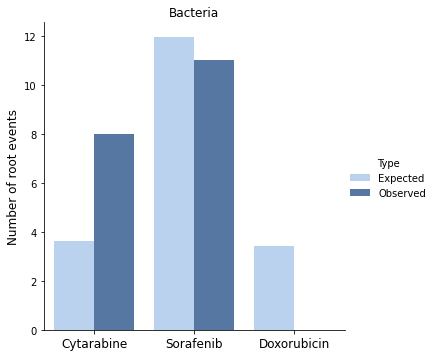

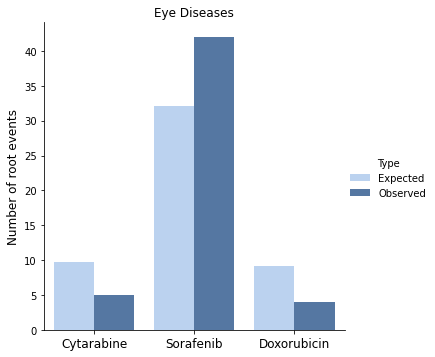

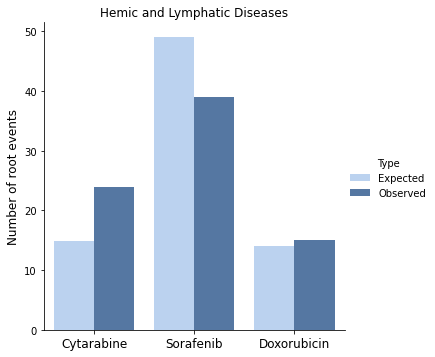

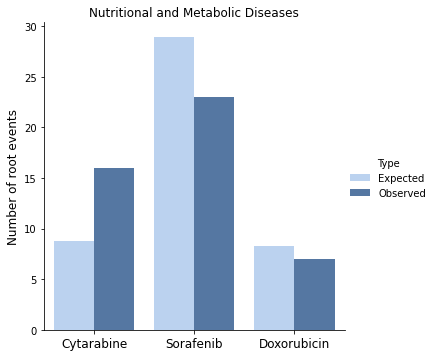

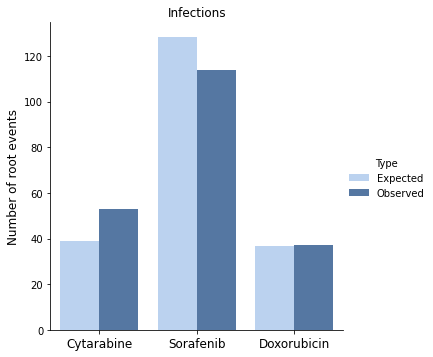

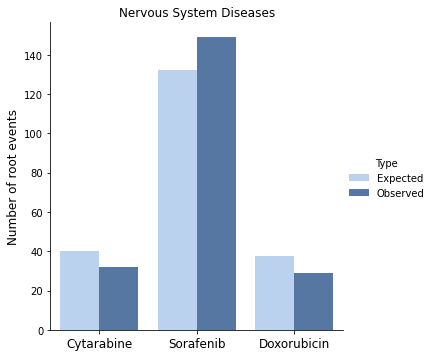

In [287]:
def plotting (event):
    drugs = ["Cytarabine", "Sorafenib", "Doxorubicin"]

    observed = merged_roots[event].values
    observed_rates = pd.DataFrame({
        "Drugs": drugs, "Number": observed
    })
    observed_rates["Type"] = "Observed"

    expected = total_events.sum(axis=1)*merged_roots[event].sum()/total_events.sum(axis=1).sum()
    expected_rates = pd.DataFrame({
        "Drugs": drugs, "Number": expected
    })
    expected_rates["Type"] = "Expected"
    
    colors = ["#B2D1F8", "#4875AF"]
    
    plot_rates = pd.concat([expected_rates,observed_rates])
    sns.catplot(x="Drugs",y="Number", hue="Type", data=plot_rates,kind="bar", palette=colors)
    plt.title(event,fontsize=12)
    plt.ylabel("Number of root events",fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel(None)
    plt.show()

event_list = ["Bacteria", "Eye Diseases", "Hemic and Lymphatic Diseases", "Nutritional and Metabolic Diseases", "Infections",
             "Nervous System Diseases"]

for event in event_list:
    plotting(event)

In [288]:
cytarabine_parent = cytarabine_root_parent[["Serious Adverse Event", "Disease code", "Parent"]].drop_duplicates()
sorafenib_parent = sorafenib_root_parent[["Serious Adverse Event", "Disease code", "Parent"]].drop_duplicates()
doxorubicin_parent = doxorubicin_root_parent[["Serious Adverse Event", "Disease code", "Parent"]].drop_duplicates()

In [289]:
cytarabine_parent_count = pd.DataFrame(cytarabine_parent.groupby("Parent").size())
sorafenib_parent_count = pd.DataFrame(sorafenib_parent.groupby("Parent").size())
doxorubicin_parent_count = pd.DataFrame(doxorubicin_parent.groupby("Parent").size())

In [357]:
merged_parent = cytarabine_parent_count.merge(sorafenib_parent_count, on="Parent",suffixes=('_cytarabine', '_sorafenib'),how='outer')
merged_parent = merged_parent.merge(doxorubicin_parent_count, on="Parent",how='outer')
merged_parent = merged_parent.rename(columns={'0_cytarabine': 'cytarabine', '0_sorafenib': 'sorafenib', 0:"doxorubicin"})
merged_parent = merged_parent.transpose() 
merged_parent = merged_parent.fillna(0)
merged_parent

Parent,Adrenal Gland Diseases,Amines,Amino Acids,Antigen-Antibody Reactions,"Arthritis, Infectious",Asthenopia,Autoimmune Diseases,Autoimmune Diseases of the Nervous System,Bacterial Infections and Mycoses,Behavior,...,"Neoplasms, Second Primary",Neuroimaging,Occupational Groups,Physical Stimulation,Psychological Techniques,Psychological Tests,Shoulder Injuries,Skin Physiological Phenomena,Urinary Tract Infections,Urogenital Abnormalities
cytarabine,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,15.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sorafenib,5.0,3.0,0.0,0.0,0.0,0.0,8.0,1.0,32.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doxorubicin,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,10.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0


In [291]:
summed_lymphatic = merged_parent["Blood and lymphatic system disorders"]+ merged_parent ["Lymphatic Diseases"]
merged_parent["Lymphatic Diseases"] = summed_lymphatic
merged_parent = merged_parent.drop("Blood and lymphatic system disorders", axis=1)

summed_cardiac = merged_parent["Cardiac disorders"]+merged_parent ["Heart Diseases"]
merged_parent["Heart Diseases"] = summed_cardiac
merged_parent = merged_parent.drop("Cardiac disorders", axis=1)

summed_ear = merged_parent["Ear and labyrinth disorders"]+merged_parent ["Ear Diseases"]
merged_parent["Ear Diseases"] = summed_ear
merged_parent = merged_parent.drop("Ear and labyrinth disorders", axis=1)

summed_endocrine = merged_parent["Endocrine disorders"]+merged_parent ["Endocrine Gland Neoplasms"]
merged_parent["Endocrine Gland Neoplasms"] = summed_endocrine
merged_parent = merged_parent.drop("Endocrine disorders", axis=1)

summed_eye = merged_parent["Eye disorders"]+merged_parent ["Eye Abnormalities"]
merged_parent["Eye Abnormalities"] = summed_eye
merged_parent = merged_parent.drop("Eye disorders", axis=1)

summed_gi = merged_parent["Gastrointestinal disorders"]+merged_parent ["Gastrointestinal Diseases"]
merged_parent["Gastrointestinal Diseases"] = summed_gi
merged_parent = merged_parent.drop("Gastrointestinal disorders", axis=1)

summed_signs = merged_parent["General disorders and administration site conditions"]+merged_parent ["Signs and Symptoms"]
merged_parent["Signs and Symptoms"] = summed_signs
merged_parent = merged_parent.drop("General disorders and administration site conditions", axis=1)

summed_biliary = merged_parent["Hepatobiliary disorders"]+merged_parent ["Biliary Tract Diseases"]
merged_parent["Biliary Tract Diseases"] = summed_biliary
merged_parent = merged_parent.drop("Hepatobiliary disorders", axis=1)

summed_immune = merged_parent["Immune system disorders"]+merged_parent ["Immune System"]
merged_parent["Immune System"] = summed_immune
merged_parent = merged_parent.drop("Immune system disorders", axis=1)


summed_inv = merged_parent["Investigations"]+merged_parent ["Clinical Laboratory Techniques"]
merged_parent["Clinical Laboratory Techniques"] = summed_inv
merged_parent = merged_parent.drop("Investigations", axis=1)

summed_meta = merged_parent["Metabolism and nutrition disorders"]+merged_parent ["Metabolic Diseases"]
merged_parent["Metabolic Diseases"] = summed_meta
merged_parent = merged_parent.drop("Metabolism and nutrition disorders", axis=1)


summed_neoplasms = merged_parent["Neoplasms benign, malignant and unspecified (incl cysts and polyps)"]+merged_parent ["Neoplasms by Histologic Type"]
merged_parent["Neoplasms by Histologic Type"] = summed_neoplasms
merged_parent = merged_parent.drop("Neoplasms benign, malignant and unspecified (incl cysts and polyps)", axis=1)

summed_nervous = merged_parent["Nervous system disorders"]+merged_parent ["Neurologic Manifestations"]
merged_parent["Neurologic Manifestations"] = summed_nervous
merged_parent = merged_parent.drop("Nervous system disorders", axis=1)

summed_behavior = merged_parent["Psychiatric disorders"]+merged_parent ["Behavior"]
merged_parent["Behavior"] = summed_behavior
merged_parent = merged_parent.drop("Psychiatric disorders", axis=1)

summed_female = merged_parent["Renal and urinary disorders"]+merged_parent ["Female Urogenital Diseases"]
summed_male = merged_parent["Renal and urinary disorders"]+merged_parent ["Urologic Diseases"]
merged_parent["Female Urogenital Diseases"] = summed_female
merged_parent["Urologic Diseases"] = summed_male
merged_parent = merged_parent.drop("Renal and urinary disorders", axis=1)

summed_resp = merged_parent["Respiratory, thoracic and mediastinal disorders"]+merged_parent ["Respiration Disorders"]
merged_parent["Respiration Disorders"] = summed_resp
merged_parent = merged_parent.drop("Respiratory, thoracic and mediastinal disorders", axis=1)

summed_skin = merged_parent["Skin and subcutaneous tissue disorders"]+merged_parent ["Skin Diseases"]
merged_parent["Skin Diseases"] = summed_skin
merged_parent = merged_parent.drop("Skin and subcutaneous tissue disorders", axis=1)

summed_vascular = merged_parent["Vascular disorders"]+merged_parent ["Vascular Diseases"]
merged_parent["Vascular Diseases"] = summed_vascular
merged_parent = merged_parent.drop("Vascular disorders", axis=1)

In [292]:
summed_blood = merged_parent["Blood"]+merged_parent ["Blood Cells"]+merged_parent ["Hematologic Diseases"]
merged_parent["Hematologic Diseases"] = summed_blood
merged_parent = merged_parent.drop("Blood", axis=1)
merged_parent = merged_parent.drop("Blood Cells", axis=1)

summed_gastro = merged_parent["Gastrointestinal Diseases"]+merged_parent ["Gastrointestinal Tract"]
merged_parent["Gastrointestinal Diseases"] = summed_gastro
merged_parent = merged_parent.drop("Gastrointestinal Tract", axis=1)

summed_skin = merged_parent["Cosmetic Techniques"]+merged_parent ["Reconstructive Surgical Procedures"]+merged_parent ["Skin Diseases"]
merged_parent["Skin Diseases"] = summed_skin
merged_parent = merged_parent.drop("Cosmetic Techniques", axis=1)
merged_parent = merged_parent.drop("Reconstructive Surgical Procedures", axis=1)

summed_digest = merged_parent["Digestive System Physiological Phenomena"]+merged_parent ["Digestive System Abnormalities"]
merged_parent["Digestive System Abnormalities"] = summed_digest
merged_parent = merged_parent.drop("Digestive System Physiological Phenomena", axis=1)


summed_behavior = merged_parent["Psychological Tests"]+merged_parent ["Behavior"]
merged_parent["Behavior"] = summed_behavior
merged_parent = merged_parent.drop("Psychological Tests", axis=1)

summed_behavior = merged_parent["Leg Injuries"]+merged_parent ["Fractures, Bone"]
merged_parent["Fractures, Bone"] = summed_behavior
merged_parent = merged_parent.drop("Leg Injuries", axis=1)



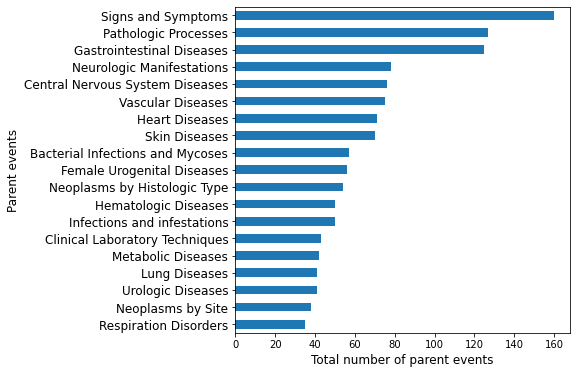

In [328]:
merged_parent.sum().nlargest(19).sort_values().plot(kind="barh", figsize=(6,6))
plt.ylabel("Parent events",fontsize=12)
plt.xlabel("Total number of parent events",fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [298]:
all_conditions = total_events.sum(axis=1).sum()
p_vals_parent = pd.DataFrame()
for i in range(merged_parent.shape[1]):
    ratio = merged_parent.iloc[:,i].sum() / all_conditions
    p_vals_parent[merged_parent.columns[i]] = chisquare(merged_parent.iloc[:,i],total_events.sum(axis=1)*ratio)
p_vals_parent

,Adrenal Gland Diseases,Amines,Amino Acids,Antigen-Antibody Reactions,...,Shoulder Injuries,Skin Physiological Phenomena,Urinary Tract Infections,Urogenital Abnormalities
0,0.219762,0.884007,3.395894,4.227273,...,4.564516,4.564516,4.564516,4.564516
1,0.895941,0.642747,0.183059,0.120798,...,0.102054,0.102054,0.102054,0.102054


In [299]:
p_vals_parent = p_vals_parent.transpose()

p_vals_parent = p_vals_parent.rename(columns={0: 'statistics', 1: 'p_values'})
p_vals_parent.sort_values("p_values").head(15)

,statistics,p_values
Sulfur Compounds,18.056696,0.000120
"Fractures, Bone",13.935484,0.000942
Hematologic Diseases,13.505341,0.001168
Metabolic Diseases,10.018648,0.006675
Gram-Negative Bacteria,9.859971,0.007227
Health Facilities,9.129032,0.010415
Proteobacteria,8.859168,0.011919
Gingivitis,8.454545,0.014592
Neurotoxicity Syndromes,8.454545,0.014592
Neoplasms by Site,8.428020,0.014787


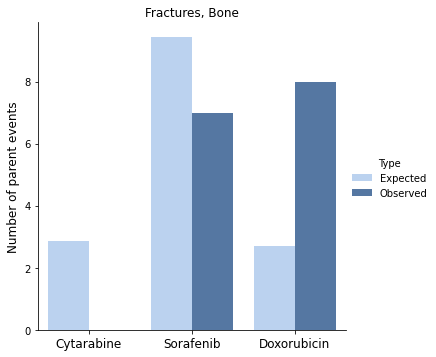

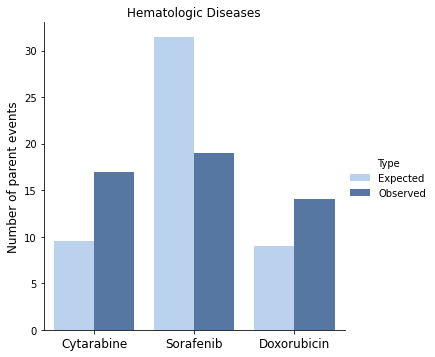

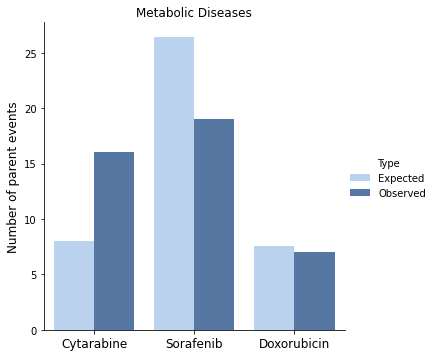

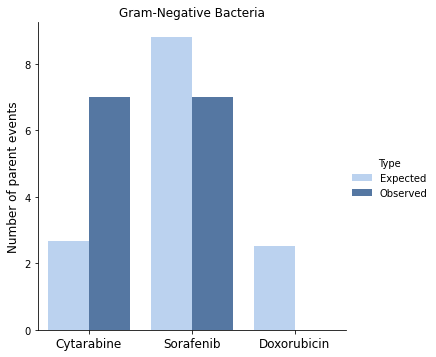

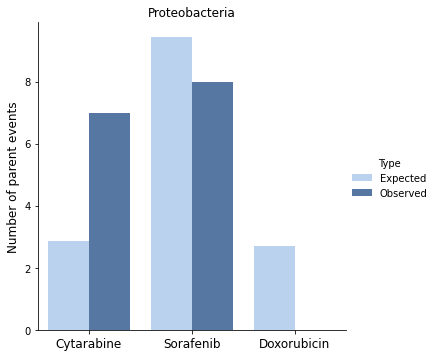

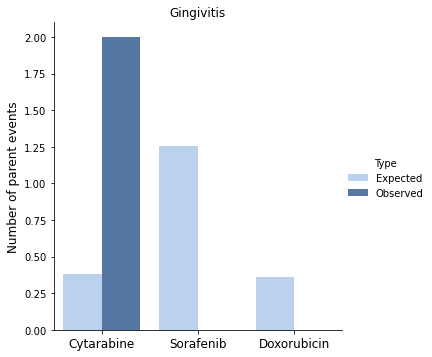

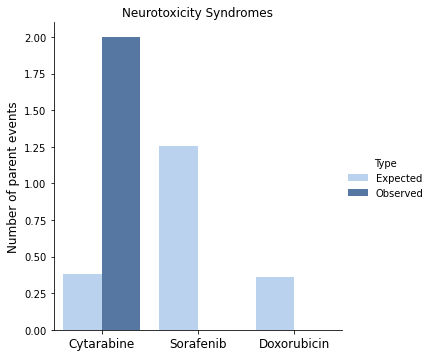

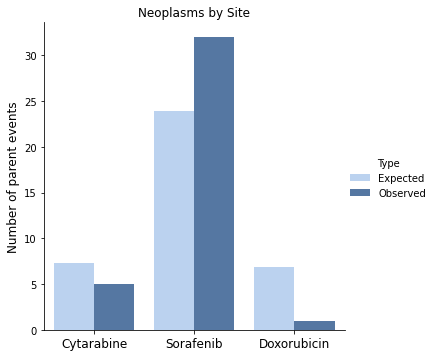

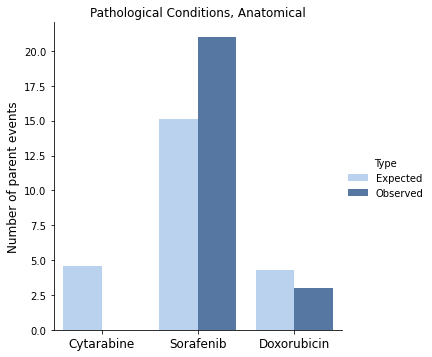

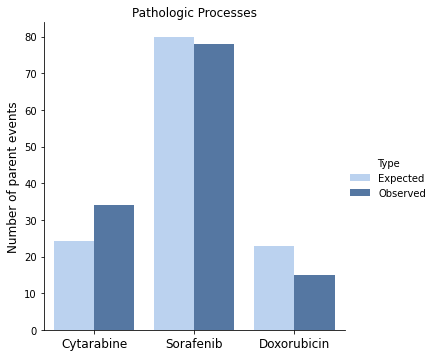

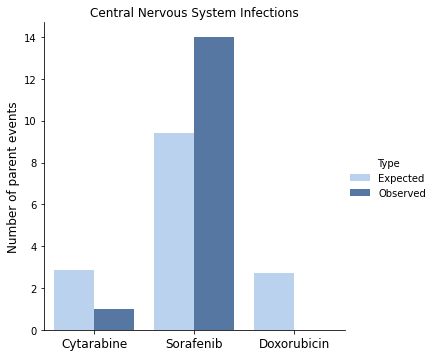

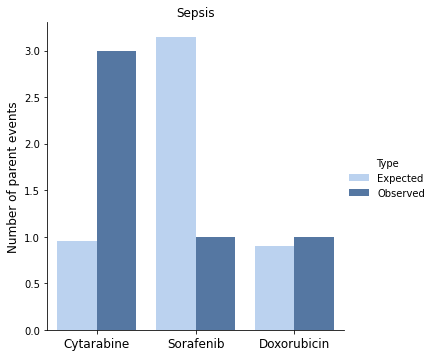

In [303]:
def plotting (event):
    drugs = ["Cytarabine", "Sorafenib", "Doxorubicin"]

    observed = merged_parent[event].values
    observed_rates = pd.DataFrame({
        "Drugs": drugs, "Number": observed
    })
    observed_rates["Type"] = "Observed"

    expected = total_events.sum(axis=1)*merged_parent[event].sum()/total_events.sum(axis=1).sum()
    expected_rates = pd.DataFrame({
        "Drugs": drugs, "Number": expected
    })
    expected_rates["Type"] = "Expected"
    
    colors = ["#B2D1F8", "#4875AF"]
    
    plot_rates = pd.concat([expected_rates,observed_rates])
    sns.catplot(x="Drugs",y="Number", hue="Type", data=plot_rates,kind="bar", palette=colors)
    plt.title(event,fontsize=12)
    plt.ylabel("Number of parent events",fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel(None)
    plt.show()

event_list = ["Fractures, Bone", "Hematologic Diseases", "Metabolic Diseases", "Gram-Negative Bacteria", "Proteobacteria",
             "Gingivitis", "Neurotoxicity Syndromes", "Neoplasms by Site", "Pathological Conditions, Anatomical",
             "Pathologic Processes", "Central Nervous System Infections", "Sepsis"]

for event in event_list:
    plotting(event)

# 4.4 Finding Similar or Simultaneous Co-Clustered Serious Adverse Events of Significant Root or Parent Events

In [ ]:
#Bacteria

In [304]:
cyt_root_sig_labeled=cytarabine_root[cytarabine_root["Root"] == "Bacteria"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_root_sig_labeled[cyt_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels


In [305]:
cyt_root_sig_labeled=sorafenib_root[sorafenib_root["Root"] == "Bacteria"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_root_sig_labeled[cyt_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels


In [306]:
cyt_root_sig_labeled=doxorubicin_root[doxorubicin_root["Root"] == "Bacteria"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_root_sig_labeled[cyt_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels


In [307]:
#Eye Disesase

In [308]:
cyt_root_sig_labeled=cytarabine_root[(cytarabine_root["Root"] == "Eye disorders")|
               (cytarabine_root["Root"] == "Eye Diseases")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_root_sig_labeled[cyt_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D001248,eyestrain,Eye Diseases,222
1,D001766,blindness transient,Eye Diseases,222


In [309]:
sor_root_sig_labeled=sorafenib_root[(sorafenib_root["Root"] == "Eye disorders")|
               (sorafenib_root["Root"] == "Eye Diseases")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_root_sig_labeled[sor_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,10038923,retinopathy,Eye disorders,6
1,10047848,watering eyes,Eye disorders,6
2,D010211,papilledema,Eye Diseases,84
3,10061322,optic nerve disorder,Eye disorders,84
4,D009877,endophthalmitis,Eye Diseases,89
5,D013285,strabismus,Eye Diseases,89
6,D009216,myopia,Eye Diseases,89
7,D015812,angle closure glaucoma,Eye Diseases,89
8,D000080324,choroidal effusions,Eye Diseases,216
9,D002386,cataract,Eye Diseases,216


In [310]:
dox_root_sig_labeled=doxorubicin_root[(doxorubicin_root["Root"] == "Eye disorders")|
               (doxorubicin_root["Root"] == "Eye Diseases")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_root_sig_labeled[dox_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels


In [311]:
## Hemic and Lymphatic Diseases

In [312]:
cyt_root_sig_labeled=cytarabine_root[(cytarabine_root["Root"] == "Blood and lymphatic system disorders")|
               (cytarabine_root["Root"] == "Hemic and Lymphatic Diseases")|
               (cytarabine_root["Root"] == "Hemic and Immune Systems")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_root_sig_labeled[cyt_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D020522,mantle cell lymphoma,Hemic and Lymphatic Diseases,74
1,D000744,autoimmune haemolytic anaemia,Hemic and Lymphatic Diseases,74
2,10025182,lymph node pain,Blood and lymphatic system disorders,74
3,D015464,leukemia chronic myeloid,Hemic and Lymphatic Diseases,193
4,D001752,blast crisis,Hemic and Lymphatic Diseases,193
5,D009504,neutrophils,Hemic and Immune Systems,282
6,D008214,lymphocytes,Hemic and Immune Systems,282


In [447]:
sor_root_sig_labeled=sorafenib_root[(sorafenib_root["Root"] == "Blood and lymphatic system disorders")|
               (sorafenib_root["Root"] == "Hemic and Lymphatic Diseases")|
               (sorafenib_root["Root"] == "Hemic and Immune Systems")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_root_sig_labeled[sor_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D018798,anemia iron-deficiency,Hemic and Lymphatic Diseases,59
1,D015451,lymphocytic leukemia chronic,Hemic and Lymphatic Diseases,59
2,D014842,von willebrand diseases,Hemic and Lymphatic Diseases,59
3,D008998,monoclonal gammopathies benign,Hemic and Lymphatic Diseases,59
4,D006099,granuloma,Hemic and Lymphatic Diseases,59
5,D018442,lymphoma b-cell marginal zone,Hemic and Lymphatic Diseases,181
6,D016393,b cell lymphoma,Hemic and Lymphatic Diseases,181


In [313]:
dox_root_sig_labeled=doxorubicin_root[(doxorubicin_root["Root"] == "Blood and lymphatic system disorders")|
               (doxorubicin_root["Root"] == "Hemic and Lymphatic Diseases")|
               (doxorubicin_root["Root"] == "Hemic and Immune Systems")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_root_sig_labeled[dox_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D000740,anemia,Hemic and Lymphatic Diseases,82
1,D013921,thrombocytopenia,Hemic and Lymphatic Diseases,82
2,D007970,leukopenia,Hemic and Lymphatic Diseases,244
3,D009503,neutropenia,Hemic and Lymphatic Diseases,244
4,D001792,platelets,Hemic and Immune Systems,264
5,D006098,granulocytes,Hemic and Immune Systems,264
6,D007962,leukocytes,Hemic and Immune Systems,264


In [315]:
# Nutritional and Metabolic Diseases

In [316]:
cyt_root_sig_labeled=cytarabine_root[(cytarabine_root["Root"] == "Metabolism and nutrition disorders")|
               (cytarabine_root["Root"] == "Nutritional and Metabolic Diseases")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_root_sig_labeled[cyt_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,10020670,hypermagnesemia,Metabolism and nutrition disorders,18
1,D007008,hypokalemia,Nutritional and Metabolic Diseases,18
2,D006943,hyperglycemia,Nutritional and Metabolic Diseases,92
3,D007010,hyponatremia,Nutritional and Metabolic Diseases,92


In [317]:
sor_root_sig_labeled=sorafenib_root[(sorafenib_root["Root"] == "Metabolism and nutrition disorders")|
               (sorafenib_root["Root"] == "Nutritional and Metabolic Diseases")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_root_sig_labeled[sor_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D009748,nutrition disorders,Nutritional and Metabolic Diseases,6
1,D065906,hyperlactatemia,Nutritional and Metabolic Diseases,6
2,D009765,obesity,Nutritional and Metabolic Diseases,35
3,D000071698,latent autoimmune diabetes in adults,Nutritional and Metabolic Diseases,35
4,D018798,anemia iron-deficiency,Nutritional and Metabolic Diseases,59
5,D014883,water-electrolyte imbalance,Nutritional and Metabolic Diseases,59
6,D010845,pickwickian syndrome,Nutritional and Metabolic Diseases,59


In [318]:
dox_root_sig_labeled=doxorubicin_root[(doxorubicin_root["Root"] == "Metabolism and nutrition disorders")|
               (doxorubicin_root["Root"] == "Nutritional and Metabolic Diseases")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_root_sig_labeled[dox_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,10021028,hypomagnesemia,Metabolism and nutrition disorders,16
1,D006996,hypocalcemia,Nutritional and Metabolic Diseases,16


In [ ]:
#Infections

In [319]:
cyt_root_sig_labeled=cytarabine_root[(cytarabine_root["Root"] == "Infections and infestations ")|
               (cytarabine_root["Root"] == "Infections")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_root_sig_labeled[cyt_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D007239,infection,Infections,66
1,D053706,typhlitis,Infections,66
2,D000038,abscess,Infections,161
3,D013203,staphylococcal infection,Infections,161
4,D004761,clostridium enterocolitis,Infections,248
5,D001170,arthritis septic,Infections,248
6,D009181,fungal infections,Infections,271
7,D001996,bronchopneumonia,Infections,271
8,D011014,pneumonia,Infections,275
9,D018805,sepsis,Infections,275


In [320]:

sor_root_sig_labeled=sorafenib_root[(sorafenib_root["Root"] == "Infections and infestations")|
               (sorafenib_root["Root"] == "Infections")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_root_sig_labeled[sor_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D000562,amoebiasis,Infections,31
1,D009175,mycoplasma infection,Infections,31
2,10065765,cranial nerve infection,Infections and infestations,32
3,10046914,vaginal infection,Infections and infestations,32
4,D008288,malaria,Infections,52
5,D020803,herpetic meningoencephalitis,Infections,52
6,10050662,prostate infection,Infections and infestations,52
7,D009889,opisthorchis felineus infection,Infections,53
8,D017497,hidradenitis suppurativa,Infections,53
9,D014394,bone tuberculosis,Infections,59


In [321]:
dox_root_sig_labeled=doxorubicin_root[(doxorubicin_root["Root"] == "Infections and infestations")|
               (doxorubicin_root["Root"] == "Infections")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_root_sig_labeled[dox_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,10064505,stoma site infection,Infections and infestations,72
1,D010304,paronychia,Infections,72
2,D055499,catheter-related infections,Infections,277
3,D004154,dipetalonema infections,Infections,277


In [322]:
# Nervous System Diseases

In [323]:
cyt_root_sig_labeled=cytarabine_root[(cytarabine_root["Root"] == "Nervous system disorders")|
               (cytarabine_root["Root"] == "Nervous System Diseases")|
               (cytarabine_root["Root"] == "Nervous System")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_root_sig_labeled[cyt_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D002534,anoxic encephalopathy,Nervous System Diseases,51
1,D009103,multiple sclerosis,Nervous System Diseases,51
2,D010291,hemiparesis,Nervous System Diseases,51
3,D008582,aseptic meningitis,Nervous System Diseases,51
4,D011115,polyneuropathy,Nervous System Diseases,82
5,D020149,neurotoxicity syndrome manganese,Nervous System Diseases,82
6,10034620,peripheral sensory neuropathy,Nervous system disorders,88
7,10034580,peripheral motor neuropathy,Nervous system disorders,88
8,D020258,toxic encephalopathy,Nervous System Diseases,227
9,D014012,tinnitus,Nervous System Diseases,227


In [324]:
pd.set_option("display.max_row", None)
sor_root_sig_labeled=sorafenib_root[(sorafenib_root["Root"] == "Nervous system disorders")|
               (sorafenib_root["Root"] == "Nervous System Diseases")|
               (sorafenib_root["Root"] == "Nervous System")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_root_sig_labeled[sor_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,10051272,facial muscle weakness,Nervous system disorders,6
1,10060929,accessory nerve disorder,Nervous system disorders,6
2,10065780,muscle weakness left-sided,Nervous system disorders,6
3,D009900,optic nerve,Nervous System,6
4,D020433,trigeminal nerve disorder,Nervous System Diseases,6
5,D006423,hemianopia,Nervous System Diseases,9
6,D006312,deafness bilateral,Nervous System Diseases,9
7,D004833,temporal lobe epilepsy,Nervous System Diseases,31
8,D000544,alzheimer type senile dementia,Nervous System Diseases,31
9,D020325,complicated migraine,Nervous System Diseases,31


In [325]:
dox_root_sig_labeled=doxorubicin_root[(doxorubicin_root["Root"] == "Nervous system disorders")|
               (doxorubicin_root["Root"] == "Nervous System Diseases")|
               (doxorubicin_root["Root"] == "Nervous System")].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_root_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_root_sig_labeled[dox_root_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event","Root", "DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Root,DB_Labels
0,D001259,ataxia,Nervous System Diseases,4
1,D004401,dysarthria,Nervous System Diseases,4
2,D000377,agnosia for pain,Nervous System Diseases,16
3,D063806,muscle pain,Nervous System Diseases,16
4,D007319,insomnia,Nervous System Diseases,16
5,D003057,progeria-like syndrome,Nervous System Diseases,34
6,D006685,voice hoarseness,Nervous System Diseases,34
7,D014786,visual impairment,Nervous System Diseases,289
8,D020275,acute inflammatory demyelinating polyneuropathy,Nervous System Diseases,289
9,D007024,orthostatic hypotension,Nervous System Diseases,294


In [326]:
# PARENTS

In [327]:
#Fractures, Bone

In [328]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Fractures, Bone"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [329]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Fractures, Bone"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [330]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Fractures, Bone"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [331]:
#Hematologic Diseases

In [332]:
cyt_parent_sig_labeled=cytarabine_parent[(cytarabine_parent["Parent"] == "Hematologic Diseases")|
               (cytarabine_parent["Parent"] == "Blood Cells")|
               (cytarabine_parent["Parent"] == "Blood")].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,D001752,blast crisis,Hematologic Diseases,193
1,D015464,leukemia chronic myeloid,Hematologic Diseases,193
2,D008214,lymphocytes,Blood Cells,282
3,D009504,neutrophils,Blood Cells,282


In [333]:
sor_parent_sig_labeled=sorafenib_parent[(sorafenib_parent["Parent"] == "Hematologic Diseases")|
               (sorafenib_parent["Parent"] == "Blood Cells")|
               (sorafenib_parent["Parent"] == "Blood")].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,D008998,monoclonal gammopathies benign,Hematologic Diseases,59
1,D018798,anemia iron-deficiency,Hematologic Diseases,59
2,D014842,von willebrand diseases,Hematologic Diseases,59


In [334]:
dox_parent_sig_labeled=doxorubicin_parent[(doxorubicin_parent["Parent"] == "Hematologic Diseases")|
               (doxorubicin_parent["Parent"] == "Blood Cells")|
               (doxorubicin_parent["Parent"] == "Blood")].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,D000740,anemia,Hematologic Diseases,82
1,D013921,thrombocytopenia,Hematologic Diseases,82
2,D007970,leukopenia,Hematologic Diseases,244
3,D009503,neutropenia,Hematologic Diseases,244
4,D001792,platelets,Blood Cells,264
5,D006098,granulocytes,Blood Cells,264
6,D007962,leukocytes,Blood Cells,264


In [335]:
# Metabolic Diseases

In [336]:
cyt_parent_sig_labeled=cytarabine_parent[(cytarabine_parent["Parent"] == "Metabolism and nutrition disorders")|
               (cytarabine_parent["Parent"] == "Metabolic Diseases")].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,10020670,hypermagnesemia,Metabolism and nutrition disorders,18
1,D007008,hypokalemia,Metabolic Diseases,18
2,D006943,hyperglycemia,Metabolic Diseases,92
3,D007010,hyponatremia,Metabolic Diseases,92


In [337]:
sor_parent_sig_labeled=sorafenib_parent[(sorafenib_parent["Parent"] == "Metabolism and nutrition disorders")|
               (sorafenib_parent["Parent"] == "Metabolic Diseases")].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,D014883,water-electrolyte imbalance,Metabolic Diseases,59
1,D018798,anemia iron-deficiency,Metabolic Diseases,59


In [338]:
dox_parent_sig_labeled=doxorubicin_parent[(doxorubicin_parent["Parent"] == "Metabolism and nutrition disorders")|
               (doxorubicin_parent["Parent"] == "Metabolic Diseases")].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,10021028,hypomagnesemia,Metabolism and nutrition disorders,16
1,D006996,hypocalcemia,Metabolic Diseases,16


In [339]:
#Gram-Negative Bacteria

In [340]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Gram-Negative Bacteria"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [341]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Gram-Negative Bacteria"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [342]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Gram-Negative Bacteria"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [343]:
#Proteobacteria

In [344]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Proteobacteria"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [345]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Proteobacteria"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [346]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Proteobacteria"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [347]:
#Gingivitis

In [348]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Gingivitis"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [349]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Gingivitis"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [350]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Gingivitis"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [351]:
#Neurotoxicity Syndromes

In [352]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Neurotoxicity Syndromes"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [353]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Neurotoxicity Syndromes"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [354]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Neurotoxicity Syndromes"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [355]:
#Neoplasms by Site

In [356]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Neoplasms by Site"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [357]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Neoplasms by Site"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,D001859,bone neoplasm,Neoplasms by Site,52
1,D000071960,breast carcinoma in situ,Neoplasms by Site,52
2,D007822,laryngeal cancer,Neoplasms by Site,59
3,D001932,brain neoplasm,Neoplasms by Site,59
4,D012004,rectal cancer,Neoplasms by Site,158
5,D002282,bronchioloalveolar carcinoma,Neoplasms by Site,158
6,D010190,pancreatic neoplasm,Neoplasms by Site,158
7,D009464,acoustic neuroma,Neoplasms by Site,163
8,D000077274,nasopharyngeal carcinoma,Neoplasms by Site,163
9,D006338,neoplasms cardiac,Neoplasms by Site,228


In [358]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Neoplasms by Site"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [359]:
#Pathological Conditions, Anatomical

In [360]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Pathological Conditions, Anatomical"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [361]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Pathological Conditions, Anatomical"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,D006332,cardiomegaly,"Pathological Conditions, Anatomical",52
1,D006529,hepatomegaly,"Pathological Conditions, Anatomical",52
2,D009133,muscle atrophy,"Pathological Conditions, Anatomical",52


In [362]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Pathological Conditions, Anatomical"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [363]:
#Central Nervous System Infections

In [364]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Central Nervous System Infections"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [365]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Central Nervous System Infections"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
0,D016919,cryptococcal meningitis,Central Nervous System Infections,181
1,D020306,tuberculosis central nervous system,Central Nervous System Infections,181


In [366]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Central Nervous System Infections"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [367]:
#Sepsis

In [368]:
cyt_parent_sig_labeled=cytarabine_parent[cytarabine_parent["Parent"] == "Sepsis"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(cyt_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
cyt_parent_sig_labeled[cyt_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [369]:
sor_parent_sig_labeled=sorafenib_parent[sorafenib_parent["Parent"] == "Sepsis"].merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(sor_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
sor_parent_sig_labeled[sor_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels


In [370]:
dox_parent_sig_labeled=doxorubicin_parent[doxorubicin_parent["Parent"] == "Sepsis"].drop_duplicates("Disease code").merge(scaled_nopca_data, on= "Disease code").sort_values("DB_Labels")
check = pd.DataFrame(dox_parent_sig_labeled.groupby("DB_Labels").size()).reset_index()
labels = list(check[check[0]>1]["DB_Labels"])
dox_parent_sig_labeled[dox_parent_sig_labeled["DB_Labels"].isin(labels)][["Disease code", "Serious Adverse Event", "Parent","DB_Labels"]].reset_index(drop=True)

,Disease code,Serious Adverse Event,Parent,DB_Labels
